# Segmentation

### 세그멘테이션 문제의 종류

세그멘테이션 모델들은 다양한 분야에서 활용되고 있다. 자율주행 카메라에 적용되어 이미지의 의미를 해석하기도 하고 의료 이미지에서 병이 있는 영역을 판별해 내기도 한다.

이때 이미지 내에서 영역을 분리하는 접근 방식은 크게 두가지 방식이 있다. 바로 시맨틱 세그멘테이션(semantic segmentation)과 인스턴스 세그멘테이션(instance segmentation)이다. 영역을 분리하는 관점에서 비슷하지만, 접근 방식에 따라 문제의 정의와 모델을 구성하는 방식이 달라진다. 아래 그림은 그러한 좋은 예시를 보여준다.

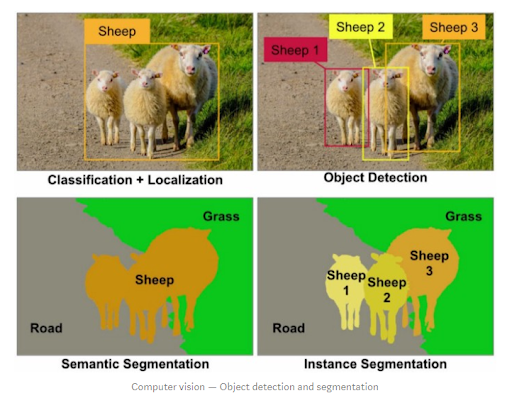

먼저 위 그림의 상단 두 사진을 보자. 좌상단 사진은 양들이 길에 있는 사진에서 단지 어떤 물체들이 모여 있는 영역의 위치를 인식(localization)과 이 물체들이 양이라는 것을 판별(classification)하는 접근법을 보여준다. 그러나 우상단 사진은 비슷하지만  개별 양들의 개체 하나하나의 위치를 정확히 식별하는 객체 인식(object detection)의 접근법을 보여준다.

하단의 두 사진도 이와 비슷한 대비를 보여준다. 두 사진 모두 세그멘테이션의 결과를 보여주는 사진이라는 점에서 동일하다. 좌하단의 경우 양, 길, 풀밭의 영역을 정확히 구분해낼 뿐 양들 각각의 구분해 내진 않는다. 이런 접근 방식을 시맨틱 세그멘테이션 이라고 한다. 그러나 우하단의 경우 각 양의 개체들의 영역을 픽셀 단위로 정확히 구분해 내고 있다. 이것은 인스턴스 세그멘테이션 사례가 된다.

#### 1. 시맨틱 세그멘테이션(Semantic Segmentation)

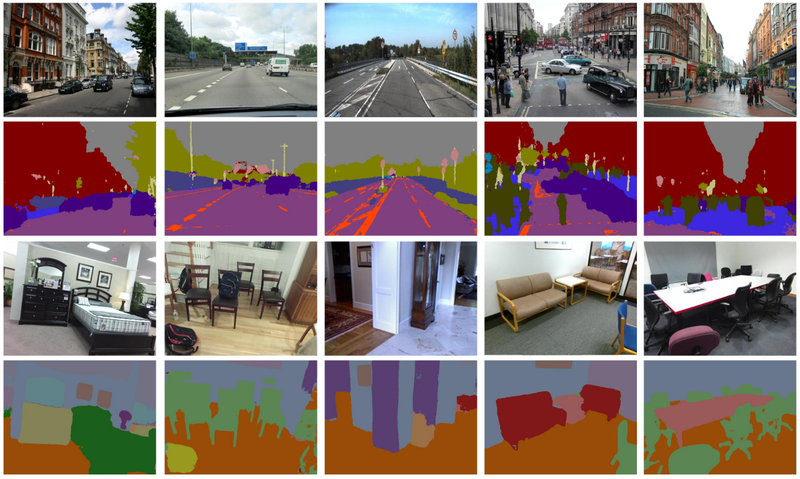

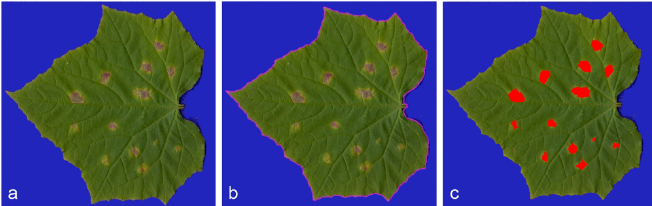

위 사진들은 모두 시맨틱 세그멘테이션의 또 다른 사례들을 보여준다.

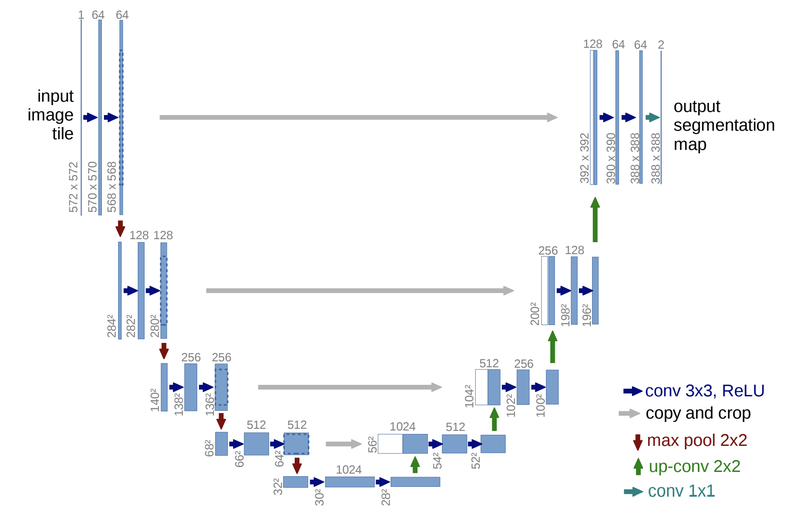

위 모델 구조는 시맨틱 세그멘테이션의 대표적인 모델의 U-Net의 구조이다. 다음 스텝에서 좀 더 자세히 다룰 예정이다. 간단히 구조만 살펴보자면, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두가지의 클래스를 가진 세그멘테이션 맵(segmentation map)이 나온다. 두가지 클래스는 가장 마지막 레이어의 채널 개수가 "2"라는 점에서 확인할 수 있다.

이때 두가지의 클래스를 문제에 따라 다르게 정의하면 클래스에 따른 시맨틱 세그멘테이션 맵(semantic segmentation map)을 얻을 수 있다. 처음 봤던 예제의 인물사진 모드라면 사람의 영역과 배경 클래스를, 의료 인공지능에서는 세포 사진에서 병이 있는 영역과 정상인 영역 등을 지정해 적용할 수 있다.

이전에 우리가 봤던 이미지 분류나 물체 검출 문제보다 확실히 큰 출력값을 볼 수 있다. 그 이유는 세그멘테이션을 위해서 이미지의 각 픽셀에 해당하는 영역의 클래스별 정보가 필요하기 때문이다.

#### 2. 인스턴스 세그멘테이션(Instance Segmentation)

인스턴스 세그멘테이션은 같은 클래스 내에서도 각 개체(instance)들을 분리하여 세그멘테이션을 수행한다. 위에서 언급한 시맨틱 세그멘테이션보다 더욱 어려운 과제일 텐데 어떻게 접근하면 좋을까? 우리가 지금까지 배워왔던 방식으로 짐작해 본다면 물체 검출(object detection) 모델로 각 개체를 구분하고 이후에 각 개체 별로 시맨틱 세그멘테이션을 수행하면 인스턴스 세그멘테이션을 할 수 있지 않을까?

이러한 방식 중 대표적인 것이 Mask-R-CNN이다. 2017년에 발표된 Mask-R-CNN은 2-Stage Object Detection의 가장 대표적인 Faster-R-CNN을 계승한 것으로서,

Faster-R-CNN의 아이디어인 Region of Interest Pooling Layer(RolPool) 개념을 개선하여 정확한 Segmentation에 유리하게 한

1. RolAlign

2. 클래스별 마스크 분리

라는 단순한 두가지 아이디어를 통해, 클래스별 Object Detection과 시맨틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것으로 평가받는 중요한 모델이다.

여기서 잠시 Faster-R-CNN 계열에서 사용하는 RolPool 개념과 그 한계점이 대해 잠시 알아보자.

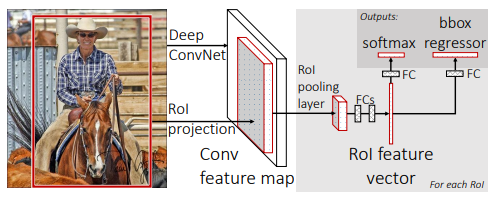

위 RolPool Layer는 다양한 Rol 영역을 Pooling을 통해 동일한 크기의 Feature map으로 추출해 내는 레이어이다. 이후 이 고정 사이즈의 Feature map을 바탕으로 바운딩 박스와 object의 클래스를 추론해 낸다.

이 구성은 Object Detection을 위해서는 크게 문제가 되지 않는다. 그러나 object 영역의 정확한 마스킹을 필요로 하는 Segmentation 문제에서 문제가 되는 것은 바로 아래 그림에서 설명해 준다. 바로 RolPool 과정에서 Quantization이 필요하다는 점이다. 아래 그림의 예에서는 16X16으로 분할한다. 이미지에서 rol 영역의 크기는 다양한데, 모든 Rol 영역의 가로/세로 픽셀 크기가 16의 배수인 것은 아니다. 아래 그림의 예에서 가로 200, 세로 145 픽셀짜리 Rol 영역을 16X16으로 분할된 영역 중 절반 이상이 Rol영역에 덮이는 곳들로 끼워 맞추다 보면, 어쩔 수 없이 Rol 영역 밖이 포함되는 경우도 있고, 자투리 영역이 버려지는 경우도 생기게 된다.

이런 상황은 필연적으로 시맨틱 세그멘테이션의 정보손실과 왜곡을 야기하게 된다.

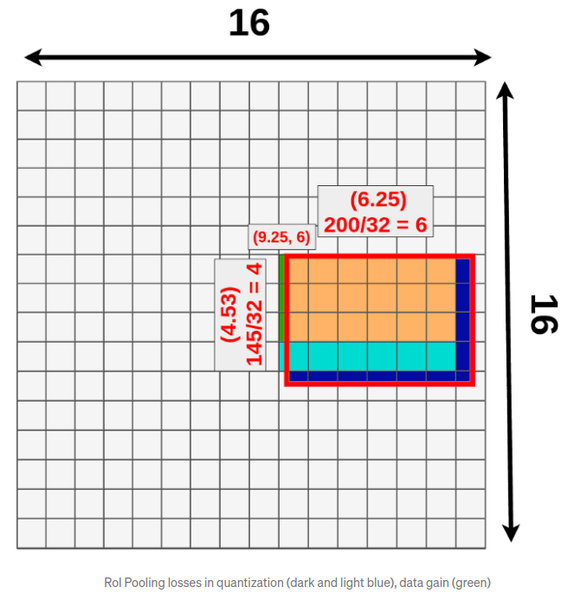

Mask-R-CNN의 RolAlign은 Quantization하지 않고도 Rol를 처리할 고정 사이즈의 Feature map을 생성할 수 있게 아이디어를 제공한다. 아이디어의 핵심은, Rol 영역을 pooling layer의 크기에 맞추어 등분한 후, RolPool을 했을 때의 quantization 영역 중 가까운 것들과의 bilinear interpolation(이중선형보간법) 계산을 통해 생성해야 할 Feature Map을 계산해 낸다는 점이다. 설명만으로는 정말 이해하기 어려울 것이다. 논문 원문보다 훨씬 명확한 설명을 제공하는 아래 글을 통해 RolAlign의 계산 방법을 다시 확인해 보자.

Mask R-CNN은 Faster R-CNN에서 특성 추출방식을 'RolAlign' 방식으로 개선을 하고 세그멘테이션을 더한 방식이다. 아래 Faster R-CNN과 비교한 구조도 보면 U-Net처럼 피처 맵(feature map)의 크기를 키워 마스크(mask)를 생성해 내는 부분을 통해 인스턴스에 해당하는 영역, 즉 인스턴스 맵을 추론한다. Mask R-CNN은 클래스에 따른 마스크를 예측할 때, 여러 가지 테스크를 한 모델로 학습하여 물체 검출의 성능을 높인다.

아래 그림을 보면 Bounding box regression을 하는 Bbox head와 마스크를 예측하는 Mask Head의 두 갈래로 나뉘는 것을 볼 수 있다. Mask map의 경우 시맨틱 세그멘테이션과 달리 상대적으로 작은 28x28의 특성 맵 크기를 갖는다. RolAlign을 통해 줄어든 특성에서 마스크를 예측하기 때문에 사용하려는 목적에 따라서 정확한 마스크를 얻으려는 경우에는 부적합할 수 있다.

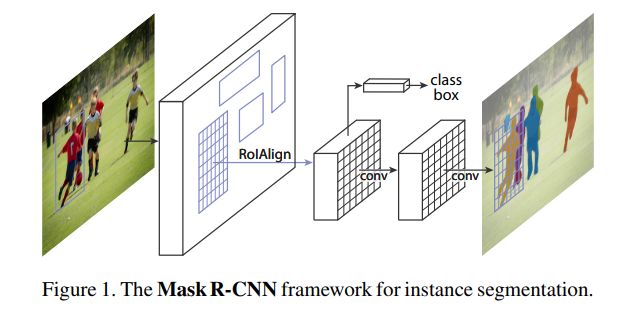

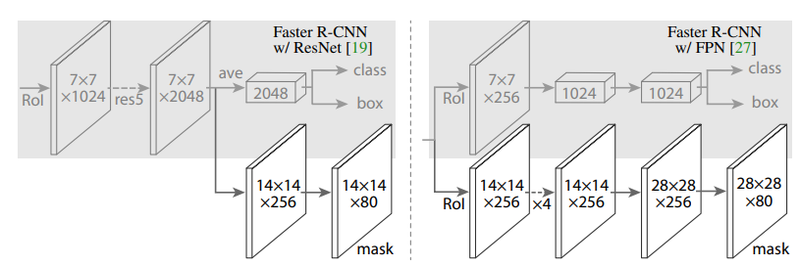

### 주요 세그멘테이션 모델 (1) FCN

이제 세그멘테이션을 위한 대표적인 방법을 몇 가지 배워보도록 하겠다. 많이 접해오셨을 이미지 분류나 물체 검출만큼, 세그멘테이션도 오랜 시간 그 목적에 따라서 여러 가지 모델이 발전되어 왔다.

시간 순서대로 Fully Convolutionall Networks for Semantic Segmentation 논문의 FCN(Fully Convolutional Network) 부터 보도록 하겠다.

https://medium.com/@msmapark2/fcn-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-fully-convolutional-networks-for-semantic-segmentation-81f016d76204

https://arxiv.org/abs/1411.4038

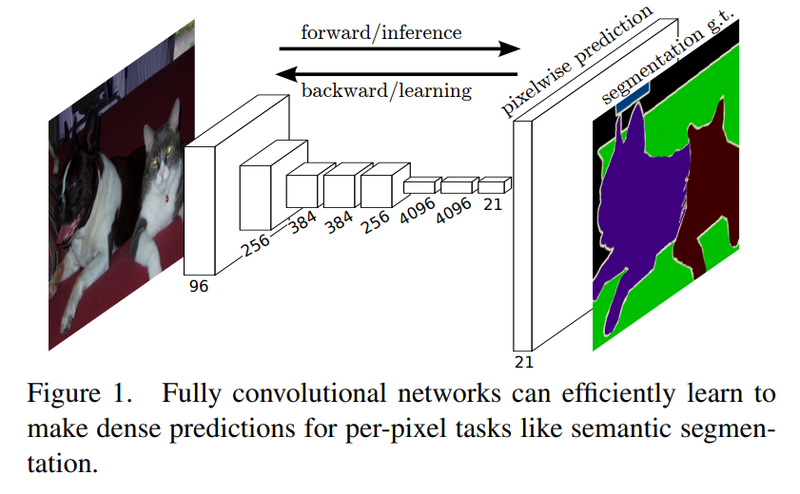

FCN은 이미지넷 첼린지(ImaageNet Challenge)에서 좋은 성적을 거두었던 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델이다. 기본적인 VGG 모델은 이미지의 특성을 추출하기 위한 네트워크의 뒷단에 fully connected layer를 붙여서 계산한 클래스별 확률을 바탕으로 분류를 수행한다. FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙여준다.

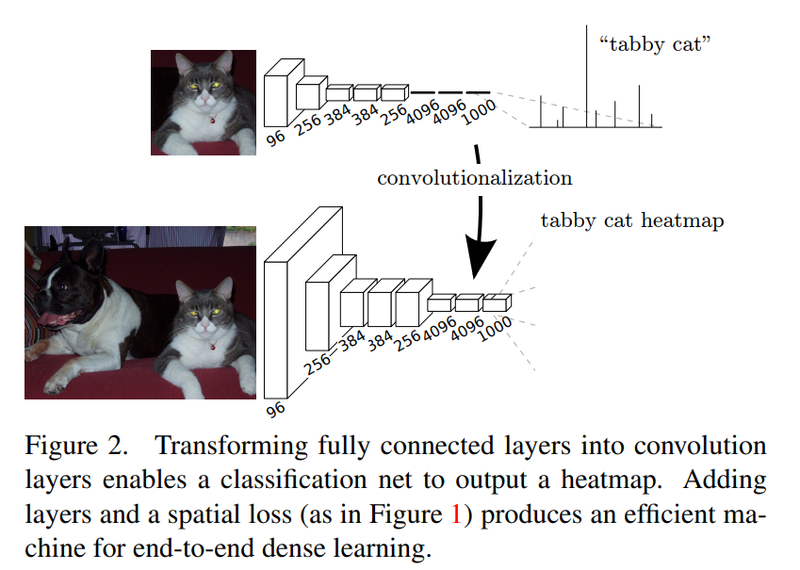

여기서 fully connected layer 대신 CNN을 붙여주는 이유가 뭘까?

아시다시피 CNN은 이미지 내 위치의 특성을 유지한다. 하지만 fully connected layer는 위치를 고려하지 않게 된다. 위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해, fully connected layer를 CNN으로 대체한다.

그렇다면 마지막 CNN은 어떤 세팅을 갖게 될까? 위치의 특성을 유지하면서 이미지 분류를 하기 위해서 마지막 CNN은 1X1의 커널 크기(kernel size)와 클래스의 개수만큼의 채널을 갖는다. 이렇게 CNN을 거치면 클래스 히트맵을 얻을 수 있다.

하지만 히트맵의 크기는 일반적으로 원본 이미지보다 작다. CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문이다. 이를 키워주는 방법을 upsampling 이라고 한다. Upsampling에는 여러 가지 방법이 있다. 그중 FCN에서는 Deconvolution과 Interpolation 방식을 활용한다. Deconvolution은 컨볼루션 연산을 거꾸로 해준 것이라고 볼 수 있다. Interpolation은 보간법으로 주어진 값들을 통해 추정해야 하는 픽셀(여기서는 특성 맵의 크기가 커지면서 메꾸어야 하는 중간 픽셀들을 의미한다.) 추정하는 방법이다.

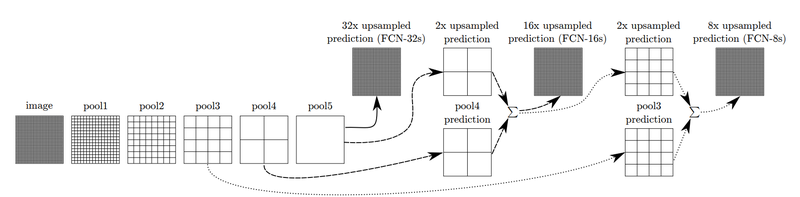

Upsampling만 하면 원하는 세그멘테이션 맵을 얻을 수 있다. 그것이 바로 FCN-32s의 경우이다.

하지만 논문에서는 더 나은 성능을 위해서 한가지 기법을 더해준다. 위 그림에서 확인할 수 있는 Skip Architecture라는 방법이다. 논문에서는 FCN-32s, FCN-16s, FCN-8s로 결과를 구분해 설명한다. FCN-16s는 앞쪽 블록에서 얻은 예측 결과 맵과, 2배로 upsampling한 맵을 더한 후, 한 번에 16배로 upsampling을 해주어 얻는다. 여기서 한 번 더 앞쪽 블록을 사용하면 FCN-8s를 얻을 수 있다. 이 기법으로 나아지는 결과는 논문 원문에 소개된 아래 그림에서 확인할 수 있다.

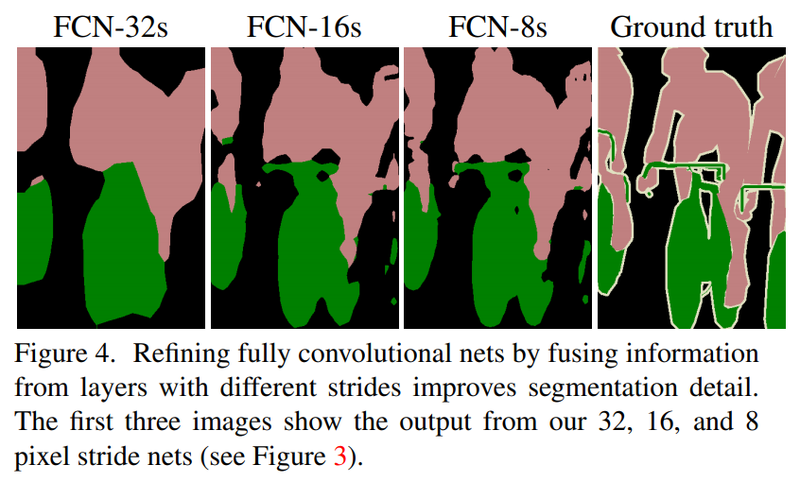

### 주요 세그멘테이션 모델 (2) U-Net

https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a

https://arxiv.org/pdf/1505.04597.pdf

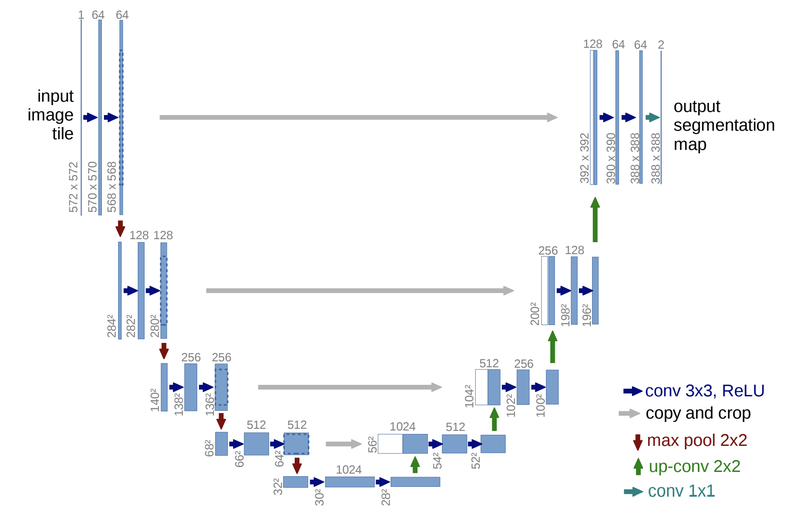

U-Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띠고 있다. FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것이다. 특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러 가지 이미지 테스크에서 사용되는 유명한 네트워크가 되었지만, 본래 의학 관련 논문으로 시작되었다는 점이다. 논문 제목에서도 biomedical image segmentation을 위한 네트워크라는 점을 알 수 있다. 아래 Fig.2. 그림과 같이 세포의 영역을 세그멘테이션 하기 위해 개발된 방법이다.

#### 전체 구조

논문에서는 네트워크 구조를 좌측의 Contracting path와 우측의 Expansive path 두가지로 구분한다.

좌측의 Contracting path는 일반적으로 우리가 사용해왔던 Convolution network와 유사한 구조를 가진다. 각 블록은 두개의 3x3 convolution 계층과 ReLu를 가지고 그 뒤로 downsampling을 위해서 2x2의 커널을 2 stride로 max pooling을 하게 된다.

Downsampling을 거친 후 다음 convolution의 채널 크기는 두배씩 늘어나도록 설계되었다.

Expansive path에서는 각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어났다. Expansive path의 블록은 contracting block과 동일하게 3x3 convolution이 두개씩 사용되었다.

두 Path에서 크기가 같은 블록의 출력과 입력은 skip connection처럼 연결해 주어 low-level의 feature를 활용할 수 있도록 하였다. 마지막에는 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 얻을 수 있다.

결과적으로, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두가지의 클래스를 가진 세그멘테이션 맵(segmentation map))이 나온다.

마지막 세그멘테이션 맵의 크기가 입력 이미지와 다른 것은 앞에서 이야기한 것처럼 세그멘테이션 맵을 원하는 크기로 조정하여(resize) 해결할 수 있다. 원본 이미지에 맞게 크기를 조정해 주면 위에서 봤던 우리가 원하는 시맨틱 세그멘테이션 결과를 얻을 수 있게 되었다.

#### 타일(Tile) 기법

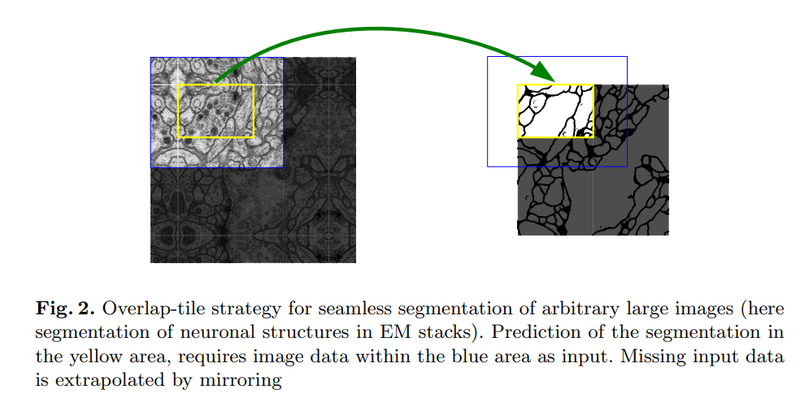

U-Net이 downsampling과 upsamplig(또는 인코딩과 디코딩)을 대칭으로 하는 점은 구조에서 한눈에 파악이 된다. 그럼 또 다른 차이는 뭘까? 얻을 수 있는 세그멘테이션 맵의 해상도이다. FCN은 입력 이미지의 크기를 조정하여 세그멘테이션 맵을 얻어낸다. 반면, U-Net은 타일 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론, 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 했다.

#### 데이터 불균형 해결

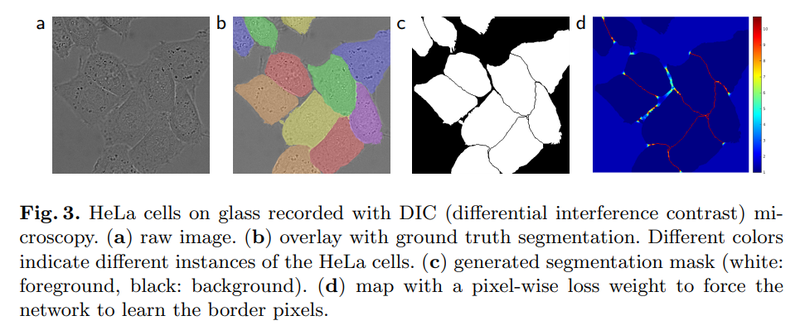

세포를 검출해 내기 위해서는 세포들의 영역뿐만 아니라 경계 또한 예측을 해야 한다. 이때 픽셀 단위로 라벨을 매긴다고 생각하면, 데이터셋에 세포나 배경보다는 절대적으로 세포 간 경계의 면적이 작을 것이다. 이러한 클래스 간 데이터 양의 불균형을 해결해 주기 위해서 분포를 고려한 weight map을 학습 때 사용했다고 한다.

여기서 weight map의 weight를 신경망의 학습 파라미터를 가리키는 weight로 착각할 수도 있을 것 같다. 실제로 여기서 말하는 weight는 손실 함수(loss)에 적용되는 가중치를 말한다. 의료 영상에서 세포 내부나 배경보다는 상대적으로 면적이 작은 세포 경계를 명확하게 추론해 내는 것이 더욱 중요하기 때문에, 세포 경계의 손실에 더 많은 패널티를 부과하는 방식이다.

### 주요 세그멘테이션 모델 (3) DeepLab 계열

https://blog.lunit.io/2018/07/02/deeplab-v3-encoder-decoder-with-atrous-separable-convolution-for-semantic-image-segmentation/

https://medium.com/hyunjulie/2%ED%8E%B8-%EB%91%90-%EC%A0%91%EA%B7%BC%EC%9D%98-%EC%A0%91%EC%A0%90-deeplab-v3-ef7316d4209d

https://arxiv.org/pdf/1802.02611.pdf

DeepLabv3+는 이름에서 볼 수 있듯이 이전의 많은 버전을 거쳐 개선을 이뤄온 네트워크이다. 처음 DeepLab 모델이 제안된 뒤 이 모델을 개선하기 위해 Atrous Convolution와 Spatial Pyramid Pooling 등 많은 방법들이 제안되어 왔다. DeepLabv3+의 전체 구조를 본 뒤 Dilated Convolution이라고도 불리는 Atrous Convolution과 Spatial Pyramid Pooling을 살펴보도록 하겠다.

#### 전체 구조

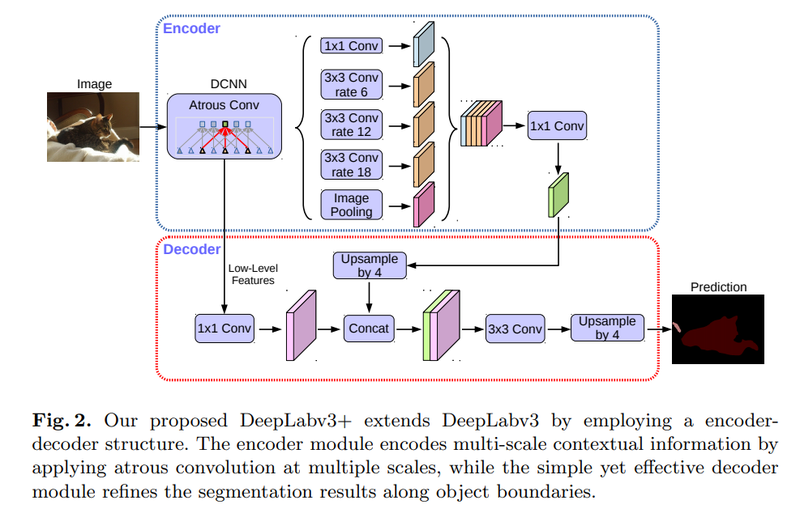

위 그림이 DeepLabV3+이다. U-Net은 구조가 직관적으로 보였지만 DeepLabV3+는 다소 복잡해 보인다. U-Net에서의 Contracting path과 Expansive path의 역할을 하는 것이 여기서는 위 그림의 인코더(Encoder), 디코더(Decoder)이다.

인코더는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈익고 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈이다. 3x3 convolution을 사용했던 U-Net과 달리 DeepLabV3+는 Atrous Convolution을 사용하고 있다. 그리고 이로 Atrous Convolution을 여러 크기에 다양하게 적용한 것이 ASPP(Atrous Spatial Pyramid Pooling)이다. DeepLab V3+는 ASPP가 있는 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해 세그멘테이션 마스크를 얻고 있다.

그럼 DeepLabV3+의 핵심을 이루는 두가지 개념을 좀 더 살펴보자.

#### Atrous Convolution

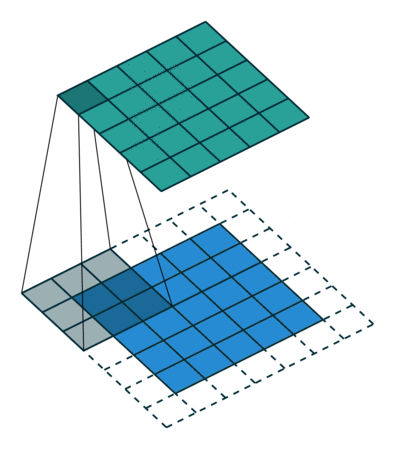

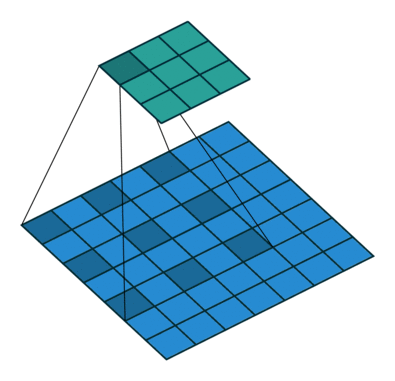

Atrous Convolution은 간단히 말하면 '띄엄띄엄 보는 컨볼루션'이다. 위 그림에서 우측의 Atrous Convolution은 위쪽의 일반적인 컨볼루션과 달리 더 넓은 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있다. 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있게 된다.

https://zzsza.github.io/data/2018/02/23/introduction-convolution/

#### Spatial Pyramid Pooling

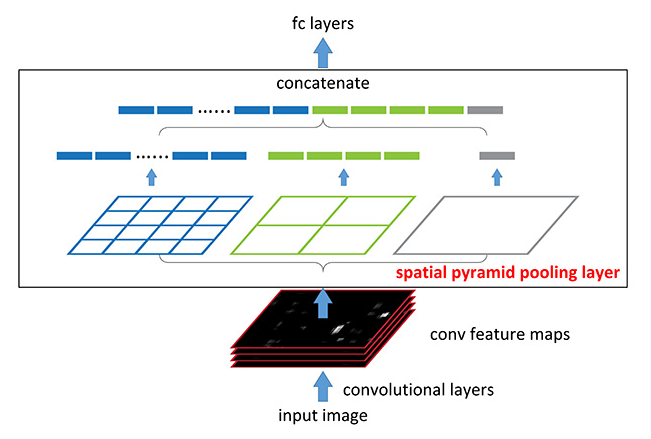

위 그림만으로도 매우 직관적으로 이해할 수 있는 Spatial Pyramid Pooling은 여러 가지 스케일로 convolution과 pooling을 하고 나온 다양한 특성을 연결(concatenate)해 준다. 이를 통해서 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있다. 여기서 컨볼루션을 Atrous Convolution으로 바꾸어 적용한 것은 Atrous Spatial Pyramid Pooling이라고 한다. 이러한 아키택쳐는 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점이 있다. 그러므로 제각기 다양한 크기와 비율을 가진 Rol 영역에 대해 적용하기에 유리하다.

https://yeomko.tistory.com/14

### 세그멘테이션의 평가

https://www.jeremyjordan.me/evaluating-image-segmentation-models/

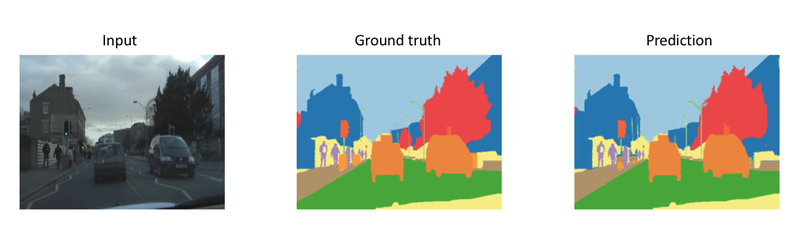

지금까지는 딥러닝 기반으로 시맨틱 세그멘테이션을 수행하는 다양한 방법들을 확인했다. 이번에는 이렇게 만들어진 모델을 평가하는 평가 지표를 알아보도록 하겠다.

일반적으로 시맨틱 세그멘테이션의 결과값은 이미지의 크기에 맞는 세그멘테이션 맵 크기와 시맨틱 클래스위 수에 맞는 채널 크기를 갖는다.

여기서 각 채널의 max probablity에 따라서 해다 위치의 클래스가 결정된다.

#### 1. 픽셀별 정확도 (Pixel Accuracy) 

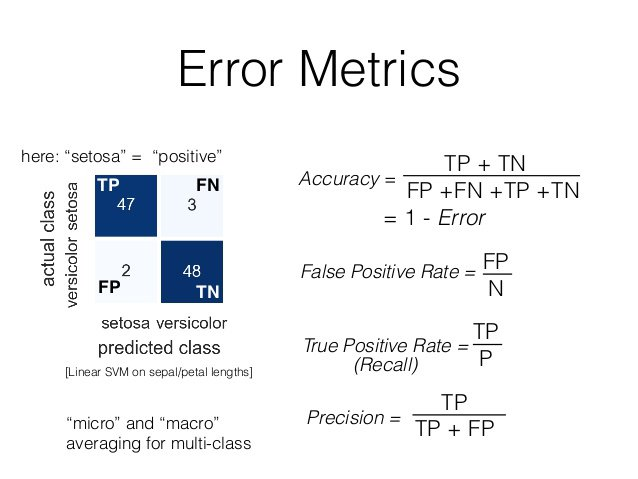

Pixel Accuracy는 쉽게 말해서 픽셀에 따른 정확도를 의미한다.

세그멘테이션 문제를 픽셀에 따른 이미지 분류 문제로 생각했을 때, 우리는 마치 이미지 분류 문제와 비슷하게 픽셀별 분류 정확도를 세그멘테이션 모델을 평가하는 기준으로 생각할 수 있다.

이때 예측 결과 맵(prediction map)을 클래스 별로 평가하는 경우에는 이진 분류 문제(binary classification)로 생각해 픽셀 및 채널 별로 평가한다. 픽셀 별 이미지 분류 문제로 평가하는 경우에는 픽셀 별로 정답 클래스를 맞추었는지 여부, 즉 True/False를 구분한다.

예를 들어, 4x4의 크기를 가지는 map에서 중앙의 2x2의 영역이 전경이고 예측 결과 중 한 칸을 놓쳤다. 이때는 위에서 보이는 Error Metrics를 확인하면 (TP+TN)/(FP+FN+TP+TN)으로 Accuracy를 구할 수 있다. TP(True Positive) + TN(True negative)는 옳게 분류된 샘플의 수로 잘못 예측된 한 칸을 제외한 15이다. 그리고 False case는 1인 한칸의 전경이 배경으로 예측되었으니 FN(False negative)이다. 따라서 분모항은 16이 된다. 따라서 Pixel Accuracy는 15/16으로 계산할 수 있다.

#### 2. 마스크 IoU (Mask Intersection-over-Union)

물체 검출 모델을 평가할 때는 정답 라벨(ground truth)와 예측 결과 바운딩 박스(prediction bounding box) 사이의 IoU(intersection over union)를 사용한다. 마스크도 일종의 영역임을 생각했을 때 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산할 수 있을 것이다. 아래 식처럼 세그멘테이션 마스크의 IoU는 생각보다 쉽게 계산할 수 있다.

    # sample for mask iou
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)

마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU 점수를 얻을 수 있다. 이를 평균하면 전체적인 시맨틱 세그멘테이션 성능을 가늠할 수 있다.

### Upsampling의 다양한 방법

지금까지 Segmentation의 종류와 접근 방식에 대해서 알아보앗다. Segmentation에서는 마스킹 단계에서 Upsampling이 중요하게 사용되었다는 것을 알 수 있었다.

Convolution layer와 다양한 Pooling 등으로 Feature의 크기를 줄여왔는데, 반대로 키우는 방법에는 어떤 방법이 있을까??

#### 1. Nearest Neighbor

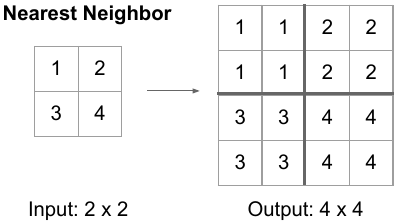

Nearest upsampling은 이름 그대로 scale을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법이다. 위 그림처럼 2x2 matrix가 있을 때 이를 2배로 키우면 4x4의 matrix가 된다. 이때 좌측 상단으로부터 2x2는 입력 matrix의 1x1과 가장 가깝다. 따라서 해당 값을 그대로 사용하게 된다.

#### 2. Bilinear Interpolation

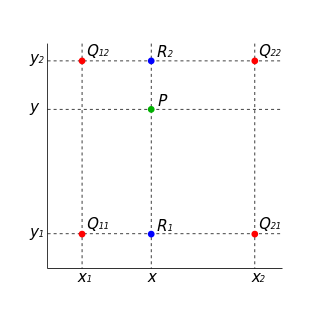

Bilinear Interpolation은 두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식이다. 우리가 2x2 matrix를 4x4로 upsampling을 할 때 위의 이미지처럼 빈 값을 채워야한다. 이에 선형보간법(Linear interpolation)을 사용하는 것이다. 이 때  축을 두 방향으로 활용하기 때문에 Bilinear interpolation이라고 한다.

위 그림에서 두가지 interpolation을 적용한 것을 순서대로 확인할 수 있다. R1dl Q11과 Q21의 x축방향의 interpolation 결과이다. 그리고 R2는 Q12와 Q22의 x축 방향의 interpolation 결과이다. 그리고 R1과 R2를 y축 방향으로 interpolation하면 새로운 위치 P의 값을 추정할 수 있다. 이러한 선형 보간 방법으로 interpolation을 하는 방법이 있고 Bicubic interpolation의 경우 삼차보간법을 사용한다.

https://bskyvision.com/m/789

#### 3. Transposed Convolution

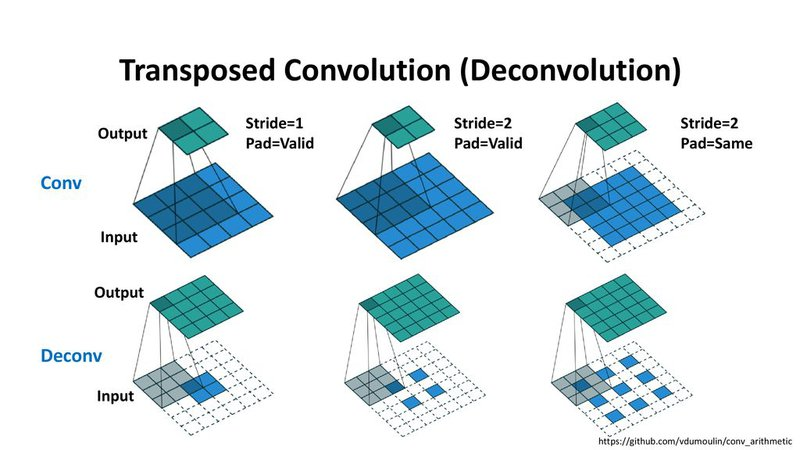

지금까지 봤던 방식은 정해진 규칙에 따라서 upscaling하는 방법들을 봤다. 그렇다면 학습할 수 있는 파라미터를 가진 Upsampling 방법이 있을까라는 생각을 해볼 수 있을 것이다. Transposed Convolution이 그 방법 중 하나이다. 우리가 사용해왔던 Convolution Layer는 Kernel의 크기를 정의하고 입력된 Feature를 Window에 따라서 output을 계산한다. Transposed Convolution은 이와 반대의 연산을 한다. 따라서 거꾸로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정해낸다. 

https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/